In [45]:
import pandas as pd
import plotly as plt
import numpy as np
import folium
import plotly.express as px 
import openpyxl

In [48]:
df = pd.read_excel("C:\\Users\\lmode\\Downloads\\trip_summary_cleaned2.xlsx")
df2 = pd.read_csv("C:\\Users\\lmode\\Downloads\\total_weekday_user.csv")

In [49]:
df.head()

,analysis_month,member_casual,day_of_week,day_of_week_num,time_of_day,total_rides,total_ride_length_minutes,avg_ride_length_minutes,median_ride_length_minutes,distinct_bike_types_used,most_popular_start_station,most_popular_end_station
0,April,casual,Saturday,6,Midday (10-16),8203,205084,25.00,14,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
1,April,casual,Sunday,0,Midday (10-16),7297,196016,26.86,16,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
2,April,casual,Friday,5,Midday (10-16),5217,115424,22.12,13,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
3,August,member,Saturday,6,Midday (10-16),21527,309439,14.37,10,2,DuSable Lake Shore Dr & North Blvd,DuSable Lake Shore Dr & North Blvd
4,April,casual,Tuesday,2,Midday (10-16),4677,101921,21.79,11,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   analysis_month              728 non-null    object 
 1   member_casual               728 non-null    object 
 2   day_of_week                 728 non-null    object 
 3   day_of_week_num             728 non-null    int64  
 4   time_of_day                 728 non-null    object 
 5   total_rides                 728 non-null    int64  
 6   total_ride_length_minutes   728 non-null    int64  
 7   avg_ride_length_minutes     728 non-null    float64
 8   median_ride_length_minutes  728 non-null    int64  
 9   distinct_bike_types_used    728 non-null    int64  
 10  most_popular_start_station  728 non-null    object 
 11  most_popular_end_station    728 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 68.4+ KB


In [51]:
df2

,casual_member,day_week,total_rides
0,casual,Monday,174045
1,casual,Tuesday,166783
2,casual,Wednesday,161988
3,casual,Thursday,185564
4,casual,Friday,234282
5,casual,Saturday,304926
6,casual,Sunday,255151
7,member,Monday,393650
8,member,Tuesday,434453
9,member,Wednesday,420579


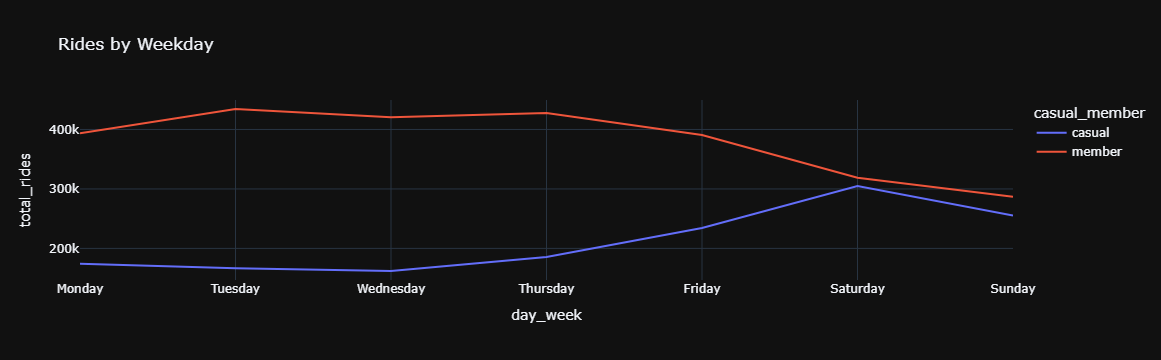

In [52]:
fig = px.line(df2, x = "day_week", y = "total_rides", 
              color = "casual_member", title = "Rides by Weekday")
fig.update_layout(template="plotly_dark")
fig.show()

In [63]:
df_sorted = df_filter[['analysis_month', 'member_casual', 'total_rides']].copy()
df_sorted

,analysis_month,member_casual,total_rides
3,August 2025,member,21527
5,August 2025,member,20715
6,August 2025,member,20248
7,October 2024,member,19918
8,October 2024,member,19536
...,...,...,...
649,January 2025,member,974
651,February 2025,member,967
654,January 2025,member,934
664,January 2025,member,802


In [62]:
df_filter = df[df['member_casual'] == "member"]
df_filter

,analysis_month,member_casual,day_of_week,day_of_week_num,time_of_day_group,total_rides,total_ride_length_minutes,avg_ride_length_minutes,median_ride_length_minutes,distinct_bike_types_used,most_popular_start_station,most_popular_end_station
3,August 2025,member,Saturday,6,B. Midday Leisure (10-16),21527,309439,"14,37",10,2,DuSable Lake Shore Dr & North Blvd,DuSable Lake Shore Dr & North Blvd
5,August 2025,member,Sunday,0,B. Midday Leisure (10-16),20715,309136,"14,92",11,2,Theater on the Lake,Theater on the Lake
6,August 2025,member,Friday,5,B. Midday Leisure (10-16),20248,257649,"12,72",9,2,Kingsbury St & Kinzie St,Kingsbury St & Kinzie St
7,October 2024,member,Wednesday,3,B. Midday Leisure (10-16),19918,215454,"10,82",8,2,University Ave & 57th St,Clinton St & Washington Blvd
8,October 2024,member,Thursday,4,B. Midday Leisure (10-16),19536,212069,"10,86",7,2,University Ave & 57th St,Clinton St & Washington Blvd
...,...,...,...,...,...,...,...,...,...,...,...,...
649,January 2025,member,Tuesday,2,D. Late Night / Early AM (20-04),974,9818,"10,08",6,2,Ellis Ave & 55th St,Ellis Ave & 60th St
651,February 2025,member,Sunday,0,A. Morning Commute (05-09),967,8259,"8,54",6,2,Clark St & Elm St,Kingsbury St & Kinzie St
654,January 2025,member,Monday,1,D. Late Night / Early AM (20-04),934,8224,"8,81",6,2,University Ave & 57th St,Loomis St & Lexington St
664,January 2025,member,Sunday,0,D. Late Night / Early AM (20-04),802,7217,"9,00",6,2,University Ave & 57th St,Ellis Ave & 60th St


In [59]:
# Supongamos que 'df_sorted' es donde aplicaste la función MonthToSeason
# Creamos una tabla de referencia limpia
mapping_estaciones = df_sorted[['analysis_month', 'season']].copy()

# Es vital que 'analysis_month' sea texto para evitar el error anterior
mapping_estaciones['analysis_month'] = mapping_estaciones['analysis_month'].astype(str)

In [64]:
def get_season(date_string):
    if not isinstance(date_string, str):
        return np.nan

    month = date_string.split()[0].strip()
    
    season_mapping ={
        'January': "Winter", "February": "Winter", "December": "Winter",
        "March": "Spring", "April": "Spring", "May": "Spring",
        "June": "Summer", "July": "Summer", "August": "Summer", "September": "Summer",
        "October": "Autumn", "November": "Autumn"
    }
    return season_mapping.get(month, np.nan)

df_sorted.loc[:, 'season'] = df_sorted['analysis_month'].apply(get_season)
df_grouped_member = df_sorted.groupby('season')['total_rides'].sum().reset_index()

In [61]:
df_grouped_casual

,season,total_rides
0,Autumn,369030
1,Spring,261798
2,Summer,787450
3,Winter,64461


In [ ]:
df.rename

In [65]:
df_grouped_member

,season,total_rides
0,Autumn,736853
1,Spring,541330
2,Summer,1119239
3,Winter,275135


In [81]:
final_df = pd.merge(df_grouped_casual, df_grouped_member, how='left', on='season')

In [84]:
final_df

,season,total_casual_rides,total_member_rides
0,Autumn,369030,736853
1,Spring,261798,541330
2,Summer,787450,1119239
3,Winter,64461,275135


In [83]:
final_df = final_df.rename(index=str, columns={"total_rides_x": "total_casual_rides", "total_rides_y": "total_member_rides"})

In [95]:
import plotly.graph_objects as px
from plotly.subplots import make_subplots
from plotly import data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

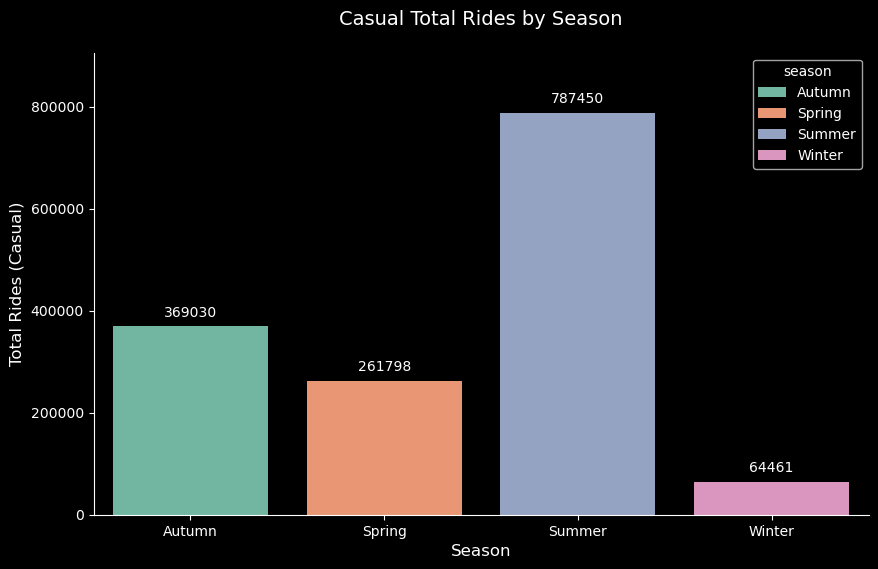

In [112]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
ax = sns.barplot(final_df, x="season", y="total_casual_rides", hue="season", legend=True, palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, color='white', fontsize=10)
max_val = final_df['total_casual_rides'].max()
ax.set_ylim(0, max_val * 1.15)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Total Rides (Casual)', fontsize=12)
ax.set_title('Casual Total Rides by Season', fontsize=14, pad=20)

sns.despine()
plt.show()

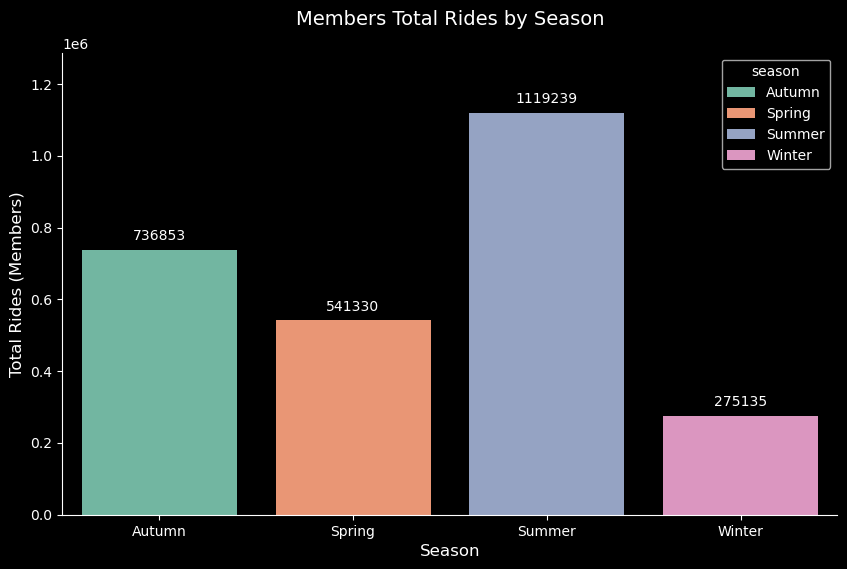

In [113]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
ax = sns.barplot(final_df, x="season", y="total_member_rides", hue="season", legend=True, palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, color='white', fontsize=10)
max_val = final_df['total_member_rides'].max()
ax.set_ylim(0, max_val * 1.15)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Total Rides (Members)', fontsize=12)
ax.set_title('Members Total Rides by Season', fontsize=14, pad=20)

sns.despine()
plt.show()

In [54]:
df = pd.read_csv("C:\\Users\\lmode\\Downloads\\distance_summary_trips.csv")

In [55]:
df.head()

,analysis_month,member_casual,total_rides_with_coordinates,avg_trip_distance_km,median_trip_distance_km
0,March 2025,casual,55882,"2,22","1,67"
1,November 2024,casual,64573,"2,03","1,51"
2,May 2025,casual,113918,"2,47","1,83"
3,October 2025,casual,133194,"2,33","1,70"
4,July 2025,casual,187611,"2,48","1,80"


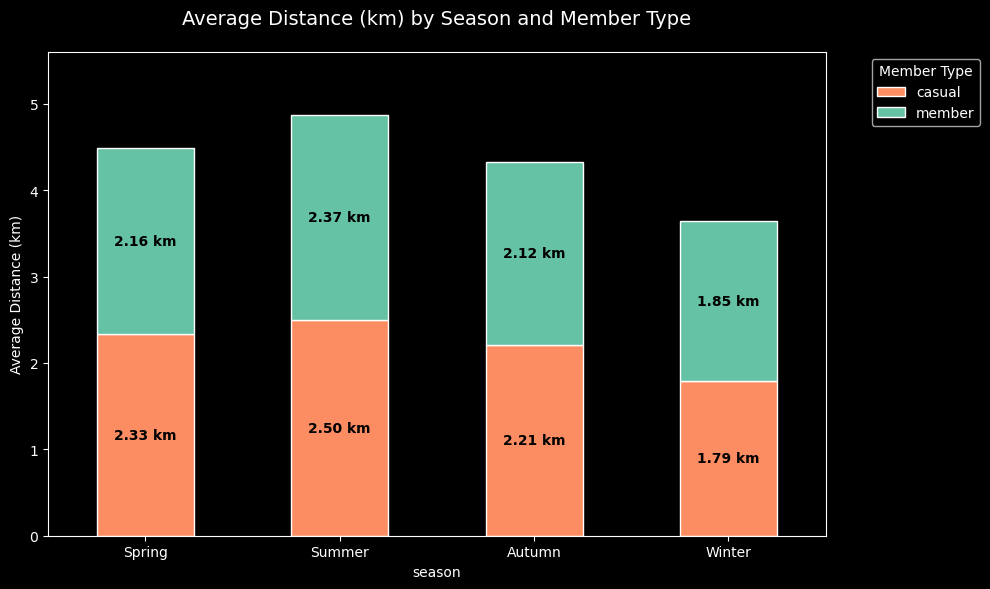

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Configuración de estilo Dark Mode
plt.style.use('dark_background')

# Función para asignar estaciones
def get_season(date_string):
    if not isinstance(date_string, str): return np.nan
    month = date_string.split()[0].strip()
    mapping = {
        'January': 'Winter', 'February': 'Winter', 'December': 'Winter',
        'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
        'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 'September': 'Summer',
        'October': 'Autumn', 'November': 'Autumn'
    }
    return mapping.get(month, np.nan)

# 2. Carga y Limpieza de datos
df_dist = pd.read_csv("C:\\Users\\lmode\\Downloads\\distance_summary_trips.csv")

# CORRECCIÓN: Cambiar coma por punto y convertir a número
df_dist['avg_trip_distance_km'] = df_dist['avg_trip_distance_km'].str.replace(',', '.').astype(float)

# Asignar estaciones
df_dist['season'] = df_dist['analysis_month'].apply(get_season)

# 3. Preparar los datos para el Stacked Bar Chart
# Calculamos la media y usamos unstack() para separar casual vs member
dist_summary = df_dist.groupby(['season', 'member_casual'])['avg_trip_distance_km'].mean().unstack()

# Ordenar las estaciones cronológicamente para que el gráfico tenga sentido
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
dist_summary = dist_summary.reindex(season_order)

# 4. Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#fc8d62', '#66c2a5'] # Colores estéticos para Dark Mode

dist_summary.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='white')

# 5. Etiquetas y Ajustes Finales
for container in ax.containers:
    # label_type='center' coloca el texto dentro de cada segmento de la barra
    ax.bar_label(container, fmt='%.2f km', label_type='center', color='black', fontweight='bold')

# Dar espacio en la parte superior para que nada se corte
max_total = dist_summary.sum(axis=1).max()
ax.set_ylim(0, max_total * 1.15)

ax.set_title('Average Distance (km) by Season and Member Type', fontsize=14, pad=20)
ax.set_ylabel('Average Distance (km)')
plt.xticks(rotation=0)
plt.legend(title='Member Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [139]:
df_dist = pd.read_excel("C:\\Users\\lmode\\Downloads\\trip_summary_cleaned2.xlsx")
df_dist.head()

,analysis_month,member_casual,day_of_week,day_of_week_num,time_of_day,total_rides,total_ride_length_minutes,avg_ride_length_minutes,median_ride_length_minutes,distinct_bike_types_used,most_popular_start_station,most_popular_end_station
0,April,casual,Saturday,6,B. Midday (10-16),8203,205084,25.00,14,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
1,April,casual,Sunday,0,B. Midday (10-16),7297,196016,26.86,16,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
2,April,casual,Friday,5,B. Midday (10-16),5217,115424,22.12,13,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
3,August,member,Saturday,6,B. Midday (10-16),21527,309439,14.37,10,2,DuSable Lake Shore Dr & North Blvd,DuSable Lake Shore Dr & North Blvd
4,April,casual,Tuesday,2,B. Midday (10-16),4677,101921,21.79,11,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   analysis_month              728 non-null    object  
 1   member_casual               728 non-null    object  
 2   day_of_week                 728 non-null    category
 3   day_of_week_num             728 non-null    int64   
 4   time_of_day                 728 non-null    category
 5   total_rides                 728 non-null    int64   
 6   total_ride_length_minutes   728 non-null    int64   
 7   avg_ride_length_minutes     728 non-null    float64 
 8   median_ride_length_minutes  728 non-null    int64   
 9   distinct_bike_types_used    728 non-null    int64   
 10  most_popular_start_station  728 non-null    object  
 11  most_popular_end_station    728 non-null    object  
 12  slot_code                   728 non-null    category
dtypes: category(3), floa

In [ ]:
# 1. Configuración de estilo Dark Mode
plt.style.use('dark_background')

# Función para asignar estaciones
def get_season(date_string):
    if not isinstance(date_string, str): return np.nan
    month = date_string.split()[0].strip()
    mapping = {
        'January': 'Winter', 'February': 'Winter', 'December': 'Winter',
        'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
        'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 'September': 'Summer',
        'October': 'Autumn', 'November': 'Autumn'
    }
    return mapping.get(month, np.nan)

# 2. Carga y Limpieza de datos
df_dist = pd.read_csv("C:\\Users\\lmode\\Downloads\\distance_summary_trips.csv")

# CORRECCIÓN: Cambiar coma por punto y convertir a número
df_dist['avg_trip_distance_km'] = df_dist['avg_trip_distance_km'].str.replace(',', '.').astype(float)

# Asignar estaciones
df_dist['season'] = df_dist['analysis_month'].apply(get_season)

# 3. Preparar los datos para el Stacked Bar Chart
# Calculamos la media y usamos unstack() para separar casual vs member
dist_summary = df_dist.groupby(['season', 'member_casual'])['avg_trip_distance_km'].mean().unstack()

# Ordenar las estaciones cronológicamente para que el gráfico tenga sentido
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
dist_summary = dist_summary.reindex(season_order)

# 4. Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#fc8d62', '#66c2a5'] # Colores estéticos para Dark Mode

dist_summary.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='white')

# 5. Etiquetas y Ajustes Finales
for container in ax.containers:
    # label_type='center' coloca el texto dentro de cada segmento de la barra
    ax.bar_label(container, fmt='%.2f km', label_type='center', color='black', fontweight='bold')

# Dar espacio en la parte superior para que nada se corte
max_total = dist_summary.sum(axis=1).max()
ax.set_ylim(0, max_total * 1.15)

ax.set_title('Average Distance (km) by Season and Member Type', fontsize=14, pad=20)
ax.set_ylabel('Average Distance (km)')
plt.xticks(rotation=0)
plt.legend(title='Member Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [164]:
print(df["time_of_day"].unique())

['B. Midday (10-16)', 'C. Evening (17-19)', 'A. Morning (05-09)', 'D. Late Night / Early AM (20-04)']
Categories (4, object): ['A. Morning (05-09)' < 'B. Midday (10-16)' < 'C. Evening (17-19)' < 'D. Late Night / Early AM (20-04)']


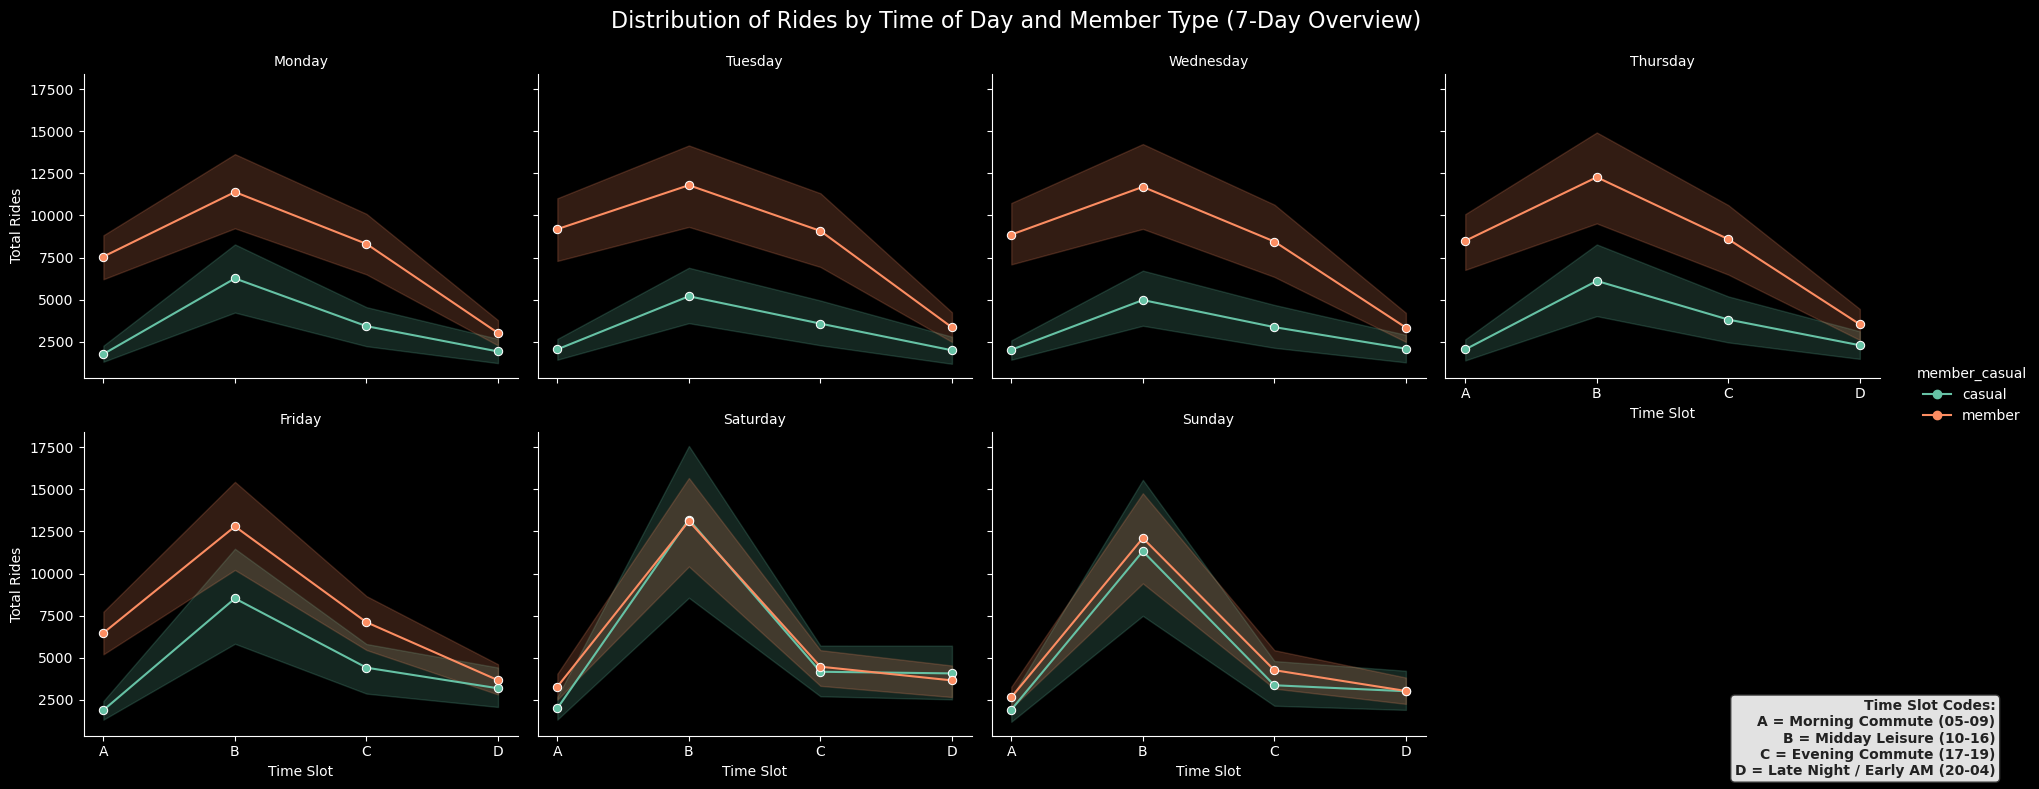

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

# 1. Configuración de Dark Mode
plt.style.use('dark_background')

# 2. Carga de datos
df = pd.read_excel("C:\\Users\\lmode\\Downloads\\trip_summary_cleaned2.xlsx")

# 3. Ordenar categorías lógicamente
# Orden de días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# Orden de franjas horarias (A, B, C, D)
slot_order = [
    "A. Morning (05-09)", 
    "B. Midday (10-16)", 
    "C. Evening (17-19)",
    "D. Late Night / Early AM (20-04)"
]
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=slot_order, ordered=True)

# --- 2. Map time_of_day to A/B/C/D --- 
slot_map = { 
    "A. Morning (05-09)": "A", 
    "B. Midday (10-16)": "B", 
    "C. Evening (17-19)": "C", 
    "D. Late Night / Early AM (20-04)": "D" 
} 
df["slot_code"] = df["time_of_day"].map(slot_map)

# 4. Crear los 7 gráficos de líneas (uno por columna)
g = sns.relplot(
    data=df,
    x="slot_code", 
    y="total_rides",
    hue="member_casual",
    col="day_of_week",
    kind="line",
    col_wrap=4,       # Esto pondrá 4 gráficos arriba y 3 abajo
    marker="o",       # Puntos en cada franja horaria
    palette="Set2",
    height=4, 
    aspect=1.2
)

# 5. Ajustes finales de formato
g.set_axis_labels("Time Slot", "Total Rides")
g.set_titles("{col_name}") # Pone el nombre del día como título de cada gráfico
g.set(xticks=["A", "B", "C", "D"])
g.tight_layout()

# Add main title
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Rides by Time of Day and Member Type (7-Day Overview)", fontsize=16)

# Add legend box for A-D meaning
legend_text = (
    "Time Slot Codes:\n"
    "A = Morning Commute (05-09)\n"
    "B = Midday Leisure (10-16)\n"
    "C = Evening Commute (17-19)\n"
    "D = Late Night / Early AM (20-04)"
)

g.fig.text(0.98, 0.02, legend_text, ha="right", va="bottom", fontsize=10, fontweight="bold", color="#222222", bbox=dict(facecolor='#f0f0f0', alpha=0.95, edgecolor='#333333', boxstyle="round,pad=0.3"))

plt.savefig("Distribution of Rides by Time of Day and Member Type")
plt.show()

In [25]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [30]:
import openpyxl
# Load the malformed CSV safely 
df = pd.read_excel( 
    "C:\\Users\\lmode\\Downloads\\trip_summary_cleaned2.xlsx")


In [31]:
df.head()

,analysis_month,member_casual,day_of_week,day_of_week_num,time_of_day,total_rides,total_ride_length_minutes,avg_ride_length_minutes,median_ride_length_minutes,distinct_bike_types_used,most_popular_start_station,most_popular_end_station
0,April,casual,Saturday,6,B. Midday Leisure (10-16),8203,205084,25.00,14,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
1,April,casual,Sunday,0,B. Midday Leisure (10-16),7297,196016,26.86,16,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
2,April,casual,Friday,5,B. Midday Leisure (10-16),5217,115424,22.12,13,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave
3,August,member,Saturday,6,B. Midday Leisure (10-16),21527,309439,14.37,10,2,DuSable Lake Shore Dr & North Blvd,DuSable Lake Shore Dr & North Blvd
4,April,casual,Tuesday,2,B. Midday Leisure (10-16),4677,101921,21.79,11,2,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave


In [71]:
!pip install Folium

In [99]:
import folium

map = folium.Map(location = [41.88660992610266, -87.63600318267368], zoom_start = 13)
map

In [110]:
most_sta_cas_stations = {
    "station_name": ["Navy Pier", "Streeter Dr & Grand Ave", "DuSable Lake Shore Dr & North Blvd", "Michigan Ave & Oak St", "Millenium Park", "Theater on the Lake"],
    "lat": [41.89244, 41.89258, 41.91195, 41.90115, 41.88125, 41.92641],
    "lon": [-87.61205, -87.61239, -87.626279, -87.62373, -87.62405, -87.63085],
    "total_rides": [12562, 9067, 7729, 8607, 2771, 4667]
}
df_stations_stacas = pd.DataFrame(most_sta_cas_stations)

In [135]:
stations = {
    "station_name": ["DuSable Lake Shore Dr & Monroe St", "DuSable Lake Shore Dr & North Blvd", "Michigan Ave & Oak St", "Streeter Dr & Grand Ave", "Millenium Park", "Navy Pier",
                    "Theater on the Lake", "Ellis Ave & 60th St", "University Ave & 57th St", "Kingsbury St & Kinzie St", "Clinton St & Washington Blvd", "Clinton St & Madison St", "Clark St & Elm St","Daley Center Plaza"],
    "lat": [41.88116, 41.91195, 41.90115, 41.89258, 41.88125, 41.89244,
           41.92641, 41.78521, 41.79164, 41.88939, 41.88353, 41.88286, 41.90313, 41.88438],
    "lon": [-87.61667, -87.626279, -87.62373, -87.61239, -87.62405, -87.61205,
           -87.63085, -87.60105, -87.59975, -87.63855, -87.64116, -87.64114, -87.63125, -87.62959],
}
df_stations = pd.DataFrame(stations)

In [126]:
most_sta_mem_stations = {
    "station_name": ["Ellis Ave & 60th St", "University Ave & 57th St", "Kingsbury St & Kinzie St", "Clinton St & Washington Blvd", "Clinton St & Madison St", "Clark St & Elm St"],
    "lat": [41.78521, 41.79164, 41.88939, 41.88353, 41.88286, 41.90313],
    "lon": [-87.60105, -87.59975, -87.63855, -87.64116, -87.64114, -87.63125],
    "total_rides": [5701, 5886, 2405, 2329, 1606, 1505]
}
df_stations_stamem = pd.DataFrame(most_sta_mem_stations)

In [127]:
most_end_mem_stations = {
    "station_name": ["Kingsbury St & Kinzie St", "Clinton St & Madison St", "Ellis Ave & 60th St", "Clinton St & Washington Blvd", "Daley Center Plaza", "University Ave & 57th St"],
    "lat": [41.88939, 41.88286, 41.78521, 41.88353, 41.88438, 41.79164],
    "lon": [-87.63855, -87.64114, -87.60105, -87.64116, -87.62959, -87.59975],
    "total_rides": [4874, 2865, 2542, 2431, 1657, 1586]
}
df_stations_endmem = pd.DataFrame(most_end_mem_stations)

In [137]:
map5 = folium.Map(location = [41.88660992610266, -87.63600318267368], zoom_start = 13)
for _, row in df_stations.iterrows():
    folium.Marker(
        location=[row["lat"], row["lon"]],
        tooltip=row["station_name"],
        icon=folium.Icon(
            icon="bicycle",
            prefix="fa",
            color="darkred"
        )
).add_to(map5)
map5

In [134]:
map4 = folium.Map(location = [41.88660992610266, -87.63600318267368], zoom_start = 13)
for _, row in df_stations_endmem.iterrows():
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=f"{row["station_name"]}<br>Total rides: {row['total_rides']}",
        tooltip=row["station_name"],
        icon=folium.Icon(
            icon="bicycle",
            prefix="fa",
            color="beige"
        )
).add_to(map4)
map4

# Casual Members Most Popular START / END Stations
|Start Station|Rides| End Station| Rides|
|-|-|-|-|
|Navy Pier|12562|DuSable Lake Shore Dr & Monroe St|12568|
|Streeter Dr & Grand Ave|9067|DuSable Lake Shore Dr & North Blv|9270|
|DuSable Lake Shore Dr & North Blv|7729|Michigan Ave & Oak St|8635|
|Michigan Ave & Oak St|8607|Streeter Dr & Grand Ave|7945|
|Millenium Park|2771|Millenium Park|6023|
|Theater on the Lake|4667|Navy Pier|5793|

# Members Most Popular START / END Stations
|Start Station|Rides| End Station| Rides|
|-|-|-|-|
|University Ave & 57th St|5886|Kingsbury St & Kinzie St|4874|
|Ellis Ave & 60th St|5701|Clinton St & Madison St|2865|
|Kingsbury St & Kinzie St|2405|Ellis Ave & 60th St|2542|
|Clark St & Elm St|2329|Clinton St & Washington Blvd|2431|
|Clinton St & Washington Blvd|1606|Daley Center Plaza|1687|
|Canal St & Madison St|1505|University Ave & 57th St|1586|


In [148]:
data = {
    "type": ["member", "member", "member", "member", "member", "member", "member", "member", "member", "member", "member", "member"], 
    "month": ["january", "february", "march","april", "may", "june", "july", "august", "september", "october", "november", "december"],
    "avg_total": [28295.0, 30068.1, 56451.1, 70670.8, 89241.8, 113856.0, 132361.8, 133326.8, 128499.9, 117388.2, 66190.2, 36646.6],
    "avg_avg": [9.4, 9.3, 10.5, 10.9, 11.6, 12.7, 13.3, 12.7, 12.2, 11.7, 10.5, 10.0],
    "avg_median": [6.2, 6.4, 7.3, 7.5, 8.2, 9.2, 9.3, 9.1, 8.8, 8.0, 7.2, 6.8]
}

df_members = pd.DataFrame(data)

In [149]:
data2 = {
    "type": ["casual", "casual", "casual", "casual", "casual", "casual", "casual", "casual", "casual", "casual", "casual", "casual"],
    "month": ["january", "february", "march","april", "may", "june", "july", "august", "september", "october", "november", "december"],
    "avg_total": [113851.4, 42670.3, 14573.0, 7679.8, 9036.6, 42327.7, 55821.3, 102559.5, 167082.1, 176506.1, 188388.7, 132128.6],
    "avg_avg": [18.9, 15.2, 13.5, 12.3, 11.9, 16.8, 18.4, 20.9, 22.8, 22.8, 22.1, 20.1],
    "avg_median": [10.5, 8.5, 7.8, 6.8, 7.0, 9.6, 10.3, 11.6, 12.9, 12.8, 12.7, 11.6]
}

df_casual = pd.DataFrame(data2)

In [150]:
df = pd.concat([df_members, df_casual])
df

,type,month,avg_total,avg_avg,avg_median
0,member,january,28295.0,9.4,6.2
1,member,february,30068.1,9.3,6.4
2,member,march,56451.1,10.5,7.3
3,member,april,70670.8,10.9,7.5
4,member,may,89241.8,11.6,8.2
5,member,june,113856.0,12.7,9.2
6,member,july,132361.8,13.3,9.3
7,member,august,133326.8,12.7,9.1
8,member,september,128499.9,12.2,8.8
9,member,october,117388.2,11.7,8.0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        24 non-null     object 
 1   month       24 non-null     object 
 2   avg_total   24 non-null     float64
 3   avg_avg     24 non-null     float64
 4   avg_median  24 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.1+ KB


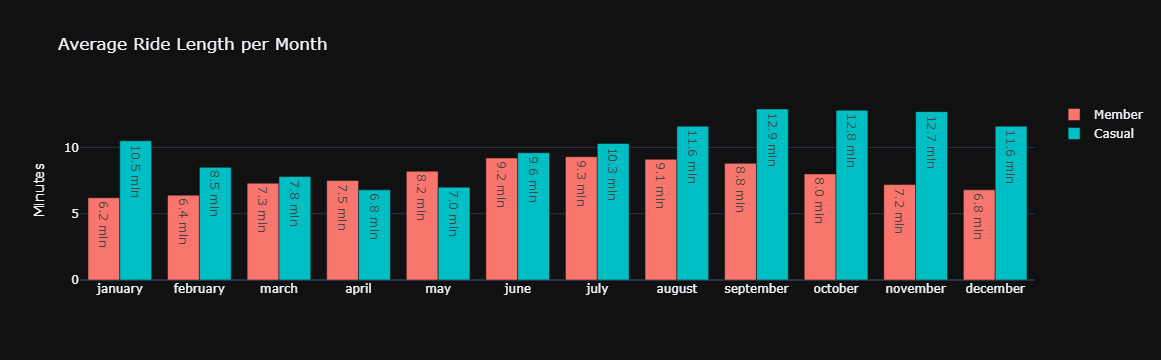

In [159]:
fig = go.Figure() 

color_map = {
    "member": "#F8766D",
    "casual": "#00BFC4"
}

for rider_type in ["member", "casual"]:
    df_sub = df[df["type"] == rider_type]

    fig.add_bar( 
        x=df_sub["month"], 
        y=df_sub["avg_median"], 
        name=rider_type.capitalize(),
        marker_color=color_map[rider_type],
        text=[f"{v:.1f} min" for v in df_sub["avg_median"]],
        textposition="auto"
    ) 

fig.update_layout( 
    barmode="group", 
    title="Average Ride Length per Month", 
    yaxis_title="Minutes",
    uniformtext_minsize=8,
    uniformtext_mode="show",
    template="plotly_dark"
) 

fig.show()